In [1]:
import sys

In [2]:
sys.path.append("/home/user/hSBM_Topicmodel")

In [5]:
from sbmtm import sbmtm
import graph_tool.all as gt
import pandas as pd

In [12]:
!pip install pandas

/usr/sbin/sh: line 1: pip: command not found


In [43]:
comments_df = pd.read_csv("/home/user/mnt/DSLab/workdir/Topic-Detection-on-Reddit/data/group_40_60.csv")

In [44]:
texts = comments_df.text.map(lambda line: line.split(" ")).to_list()

In [45]:
model = sbmtm()

model.make_graph(texts)

model.fit()

<NestedBlockState object, with base <BlockState object with 9925 blocks (14 nonempty), degree-corrected, for graph <Graph object, undirected, with 10442 vertices and 19923 edges, 2 internal vertex properties, 1 internal edge property, at 0x7effd966fe50>, at 0x7effde0e4d60>, and 5 levels of sizes [(10442, 14), (14, 6), (6, 3), (3, 2), (2, 1)] at 0x7effde0e4ee0>


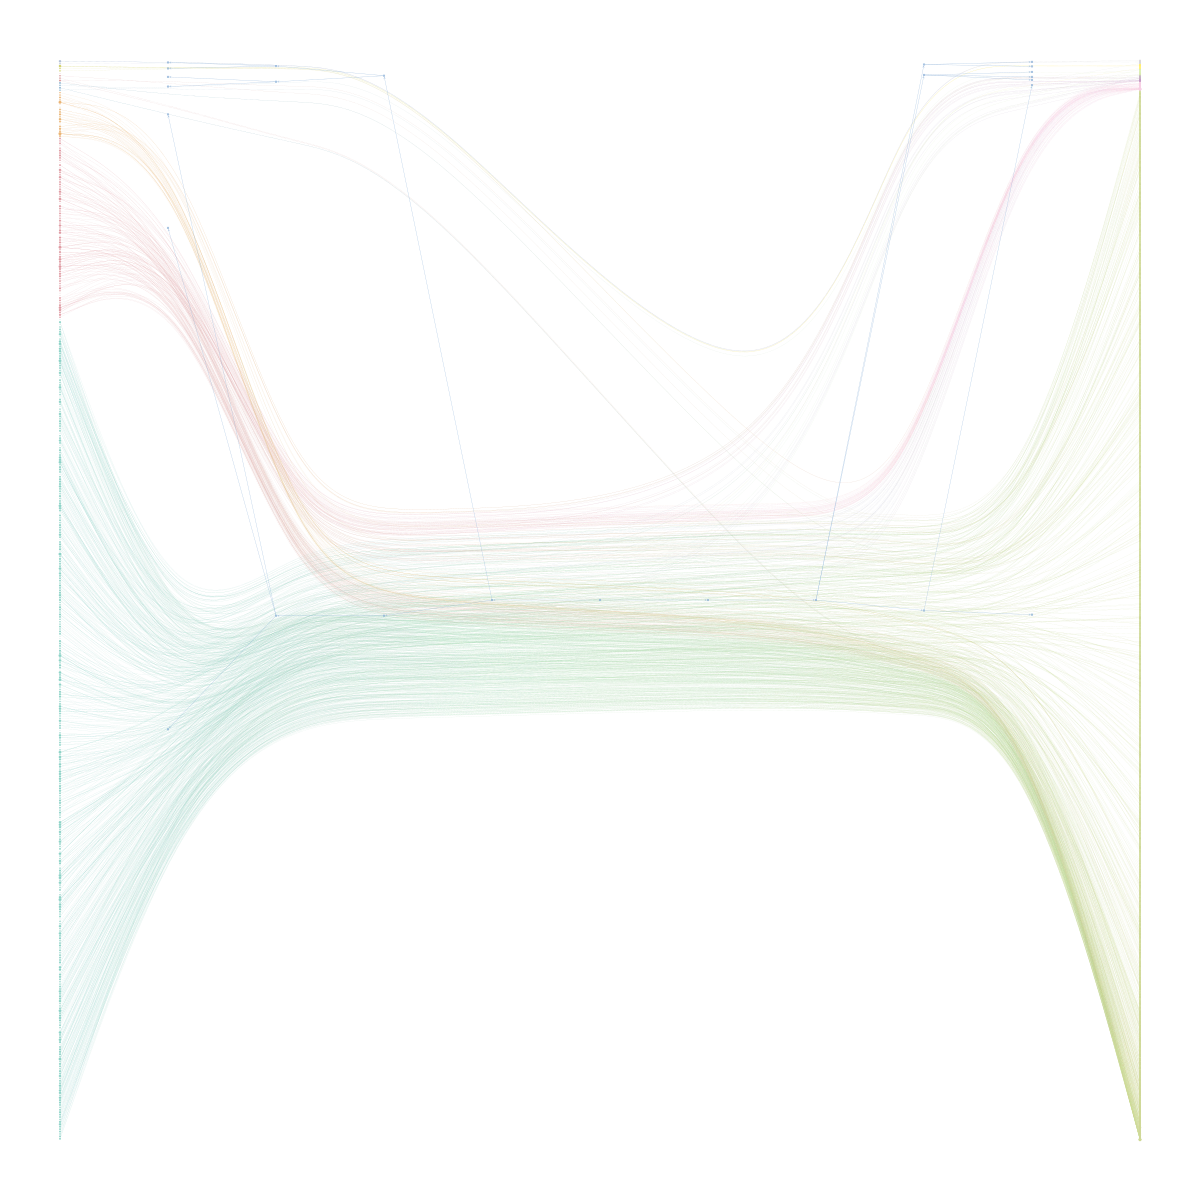

In [53]:
model.plot(nedges=1000)

In [51]:
model.topics(l=0,n=20)

{0: [('ember', 0.006109098772773963),
  ('mond', 0.005622533383791966),
  ('akar', 0.004811591068821971),
  ('ország', 0.004595339784829972),
  ('dolog', 0.004595339784829972),
  ('Orbán', 0.004379088500837974),
  ('kérdés', 0.0037303346488619777),
  ('annyi', 0.00335189490187598),
  ('rész', 0.00335189490187598),
  ('kormány', 0.0031897064388819807),
  ('tesz', 0.003135643617883981),
  ('magyar', 0.0030815807968859817),
  ('gondol', 0.003027517975887982),
  ('politikai', 0.0028653295128939827),
  ('teljes', 0.002649078228901984),
  ('beszél', 0.002486889765907985),
  ('gyurcsány', 0.0024328269449099852),
  ('több', 0.002324701302913986),
  ('tart', 0.002162512839919987),
  ('rendszer', 0.0021084500189219872)],
 1: [('mzp', 0.09057398630858346),
  ('Fidesz', 0.08004212743549237),
  ('szavaz', 0.06845708267509215),
  ('megy', 0.05107951553449184),
  ('ellenzéki', 0.03528172722485519),
  ('jelöl', 0.03264876250658241),
  ('választás', 0.030015797788309637),
  ('nyer', 0.02843601895734597